## This notebook will help you train a vanilla Point-Cloud AE with the basic architecture we used in our paper.
    (it assumes latent_3d_points is in the PYTHONPATH and the structural losses have been compiled)

In [2]:
import ipyvolume as ipv
import numpy as np
import os.path as osp

import sys, os
import pdb

from latent_3d_points.src.load_ae_model import load as load_ae

import matplotlib.pyplot as plt

model_path = '/home/yz6/code/latent_3d_points/data/train_circles2d_chamfer/models.ckpt-2000' # model path of ae model
# model_path = '/home/yz6/code/latent_3d_points/data/single_class_ae_plane_chamfer/models.ckpt-90'
num_points = 100 # number of points per object
zrotate = 'False'

# hidden_code_file = '/home/yz6/code/latent_3d_points/data/train_circles2d_chamfer/hidden.npy'

# hidden_code_file = '/home/yz6/code/latent_3d_points/data/lgan_circles2d_wasser__chamfer_100/hidden_generated.npy'


ae, conf = load_ae(model_path, zrotate, num_points, point_dimension=2)

def p(matrix):
    matrix = matrix.transpose()
    r, c = matrix.shape
    print('[')
    s_list = []
    for i in range(r):
        s_list.append((",".join(map(lambda x: str(x), matrix[i].tolist()))))
    print(";\n".join(s_list))
    print(']')


/home/yz6/.virtualenvs/gan_env/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


number of points sampled per object: 100
Building Encoder
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
encoder_conv_layer_0 conv params =  192 bnorm params =  128
Tensor("circles2d_chamfer_2/Relu:0", shape=(?, 100, 64), dtype=float32)
output size: 6400 

encoder_conv_layer_1 conv params =  8320 bnorm params =  256
Tensor("circles2d_chamfer_2/Relu_1:0", shape=(?, 100, 128), dtype=float32)
output size: 12800 

encoder_conv_layer_2 conv params =  16512 bnorm params =  256
Tensor("circles2d_chamfer_2/Relu_2:0", shape=(?, 100, 128), dtype=float32)
output size: 12800 

encoder_conv_layer_3 conv params =  33024 bnorm params =  512
Tensor("circles2d_chamfer_2/Relu_3:0", shape=(?, 100, 256), dtype=float32)
output size: 25600 

encoder_conv_layer_4 conv params =  32896 bnorm params =  256
Tensor("circles2d_chamfer_2/Relu_4:0", shape=(?, 100, 128), dtype=float32)
output size: 12800 

Tensor("circles2d_chamfer_2/Max:0

In [86]:
hidden_code_file = '/home/yz6/code/latent_3d_points/data/lgan_circles2d_wasser_chamfer_clip1_100_0/hidden_generated.npy'
hidden_z = np.load(hidden_code_file)
fake_x = ae.decode(hidden_z)

In [87]:
fake_x.mean(0).shape

(100, 2)

In [88]:
hist_x = [0] * 60
hist_y = [0] * 60
hist_r = [0] * 20

hist_center = np.zeros([60, 60], dtype=np.int)
for i, x in enumerate(fake_x):
        mean = np.mean(x, axis=0)
        centered_circle = x - mean
        radius = np.sum(centered_circle * centered_circle)
        radius /= centered_circle.shape[0]
        mean_x_index, mean_y_index = int(round(mean[0]+25)), int(round(mean[1]+25))
        radius_index = int(round(np.sqrt(radius)))
        if mean_x_index >= 0 and mean_x_index < len(hist_x) and mean_y_index >= 0 and mean_y_index < len(hist_y):
            hist_x[mean_x_index] += 1
            hist_y[mean_y_index] += 1
            hist_center[mean_x_index, mean_y_index] += 1
        if radius_index >= 0 and radius_index < len(hist_r):
            hist_r[radius_index] += 1

# print("###############SEED________%s____________###################" % manual_seed)
print(hist_x)
print(hist_y)
print(hist_r)
p(hist_center)

[1, 1, 1, 3, 7, 18, 39, 85, 152, 238, 435, 659, 970, 1335, 1897, 2730, 3477, 4453, 4995, 5476, 5548, 5370, 5012, 5207, 7293, 14800, 4947, 4536, 4664, 4489, 3700, 2615, 1783, 1195, 780, 447, 287, 179, 76, 62, 24, 9, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 2, 0, 2, 2, 10, 20, 25, 66, 119, 188, 308, 455, 690, 1006, 1456, 2026, 2786, 3664, 4700, 5414, 5005, 4418, 4934, 5681, 15283, 5654, 4655, 4675, 4935, 5006, 4234, 3299, 2458, 1925, 1406, 1013, 758, 552, 383, 290, 141, 142, 89, 44, 35, 21, 12, 5, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[89, 42656, 37964, 13705, 4305, 1050, 211, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0;
0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0;
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0;
0

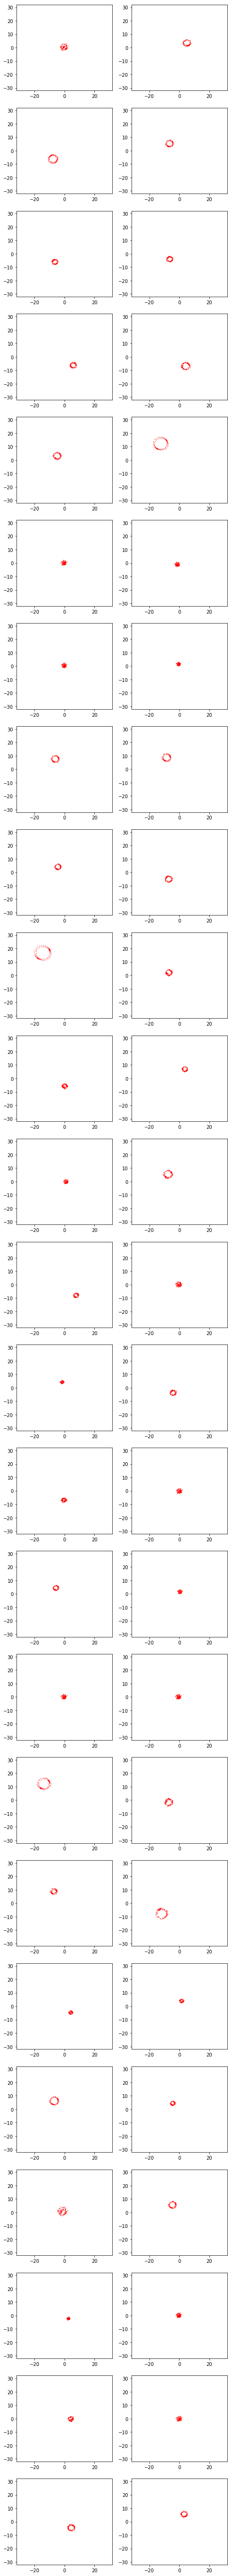

In [89]:
plt.figure(10, figsize=(8,100))
for i in range(50):
    plt.subplot(25,2,i+1)
    plt.plot(fake_x[i,:,0], fake_x[i,:,1], 'ro', markersize=0.5)
    plt.axis([-32,32,-32,32])
#     mean = np.mean(fake_x[i], axis=0)
#     print(mean)
    #plt.axis([-4,4,-4,4])
plt.show()